In [1]:
import tensorflow as tf

# 1. Configure GPU first
try:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Metal GPU configured")
    else:
        print("No GPU detected")
except RuntimeError as e:
    print(f"GPU setup error: {e}")

Metal GPU configured


In [2]:
# 2. Set mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras.regularizers import l2


In [4]:

BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "/Users/marksalloum/Polytech/ProjetViveris/backend/data/images/"

# Define the training dataset
train_dataset = image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically infers labels from subdirectory names
    label_mode='categorical',  # Return labels as one-hot encoded vectors
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # 20% for validation
    subset='training',
    seed=42
)

# Define the validation dataset
validation_dataset = image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically infers labels from subdirectory names
    label_mode='categorical',  # Return labels as one-hot encoded vectors
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # 20% for validation
    subset='validation',
    seed=42
)

# Verify the dataset structure
class_names = train_dataset.class_names
print(f"Class names: {class_names}")

for image_batch, label_batch in train_dataset.take(1):
    print(f"Image batch shape: {image_batch.shape}")
    print(f"Label batch shape: {label_batch.shape}")
    print(f"Labels: {label_batch.numpy()}")

Found 22140 files belonging to 7 classes.
Using 17712 files for training.


2025-01-28 14:25:09.963204: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-01-28 14:25:09.963237: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-01-28 14:25:09.963246: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-01-28 14:25:09.963261: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-28 14:25:09.963272: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 22140 files belonging to 7 classes.
Using 4428 files for validation.
Class names: ['bleue', 'jaune', 'marron', 'noire', 'rouge', 'special', 'verte']
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 7)
Labels: [[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


2025-01-28 14:25:10.438714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")
print(f"Number of classes: {num_classes}")

Class names: ['bleue', 'jaune', 'marron', 'noire', 'rouge', 'special', 'verte']
Number of classes: 7


2025-01-28 14:25:40.406910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


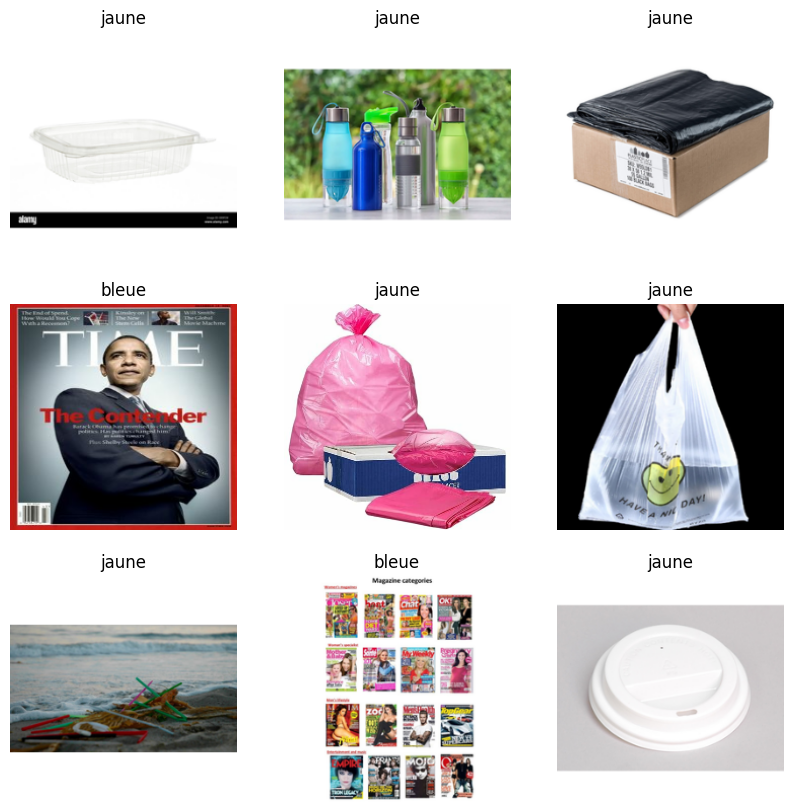

In [6]:
# Verify the dataset structure and plot some examples

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = tf.argmax(labels[i]).numpy()  # Get the index of the highest value (class)
        plt.title(class_names[label_index])
        plt.axis("off")

plt.show()

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [8]:
def data_augmenter():
    '''
    Returns:
        tf.keras.Sequential
    '''

    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    data_augmentation.add(RandomZoom(0.2))
    data_augmentation.add(RandomContrast(0.2))
    
    return data_augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0332031].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0034179688..1.0078125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0507812].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0117188].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.03125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00390625..1.0097656].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0351562].
Clipping input data 

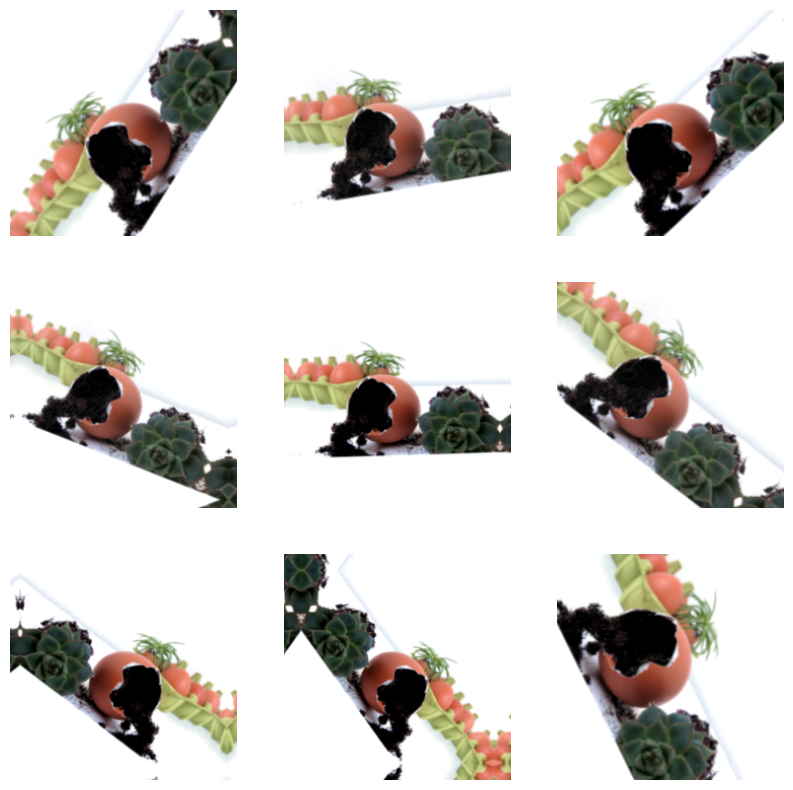

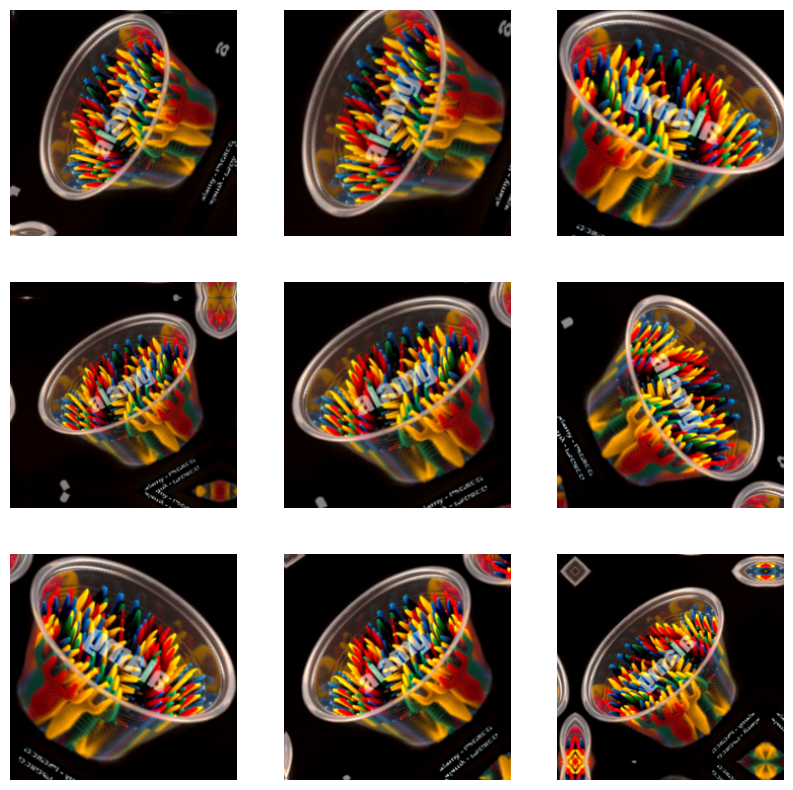

In [9]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(2):
    plt.figure(figsize=(10, 10))
    first_image = image[0]

    # Ensure the image is float32 and normalized
    first_image = tf.cast(first_image, tf.float32) / 255.0

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))

        # Convert to NumPy and ensure dtype is float32
        augmented_image = tf.squeeze(augmented_image).numpy().astype("float32")

        plt.imshow(augmented_image)
        plt.axis('off')

plt.show()

In [10]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [11]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

In [12]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast (Cast)         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ cast[0][0]        │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [13]:
num_classes = len(class_names)

def model(image_shape=IMG_SIZE, data_augmentation=data_augmenter(),num_classes=num_classes,dropout_rate=0.4):
    '''
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
        num_classes -- number of category classes
        dropout_rate -- droupout_rate for the classifaction layer
    Returns:
        tf.keras.model
    '''
    
    input_shape = image_shape + (3,)
        
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    
    # freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer
    inputs = tf.keras.Input(shape=input_shape) 
    
    # apply data augmentation to the inputs
    x = data_augmentation(inputs)
    
    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(x)
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # add the new  classification layers
    # global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 
    # dropout layer to avoid overfitting
    x = tfl.Dropout(rate=dropout_rate)(x)
    # a prediction layer with num_classes neurons with l2 regularizer
    outputs = tfl.Dense(units=num_classes,kernel_regularizer=l2(0.01))(x)
    
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [14]:
model2 = model(IMG_SIZE, data_augmentation)

In [15]:
base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# 3. Force model training on GPU
with tf.device('/device:GPU:0'):  # Force GPU usage
    initial_epochs = 5
    history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5


2025-01-28 14:25:51.281615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 62/554 ━━━━━━━━━━━━━━━━━━━━ 1:28 179ms/step - accuracy: 0.2980 - loss: 2.3138

2025-01-28 14:26:06.177996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


183/554 ━━━━━━━━━━━━━━━━━━━━ 1:06 179ms/step - accuracy: 0.4159 - loss: 1.9090

2025-01-28 14:26:27.779877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/554 ━━━━━━━━━━━━━━━━━━━━ 52s 179ms/step - accuracy: 0.4542 - loss: 1.7841

2025-01-28 14:26:41.963071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


293/554 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.4657 - loss: 1.7471

2025-01-28 14:26:47.585518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/554 ━━━━━━━━━━━━━━━━━━━━ 39s 180ms/step - accuracy: 0.4798 - loss: 1.7021

2025-01-28 14:26:55.724611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


349/554 ━━━━━━━━━━━━━━━━━━━━ 36s 180ms/step - accuracy: 0.4832 - loss: 1.6910

2025-01-28 14:26:57.951368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


372/554 ━━━━━━━━━━━━━━━━━━━━ 32s 180ms/step - accuracy: 0.4893 - loss: 1.6711

2025-01-28 14:27:02.167546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/554 ━━━━━━━━━━━━━━━━━━━━ 29s 180ms/step - accuracy: 0.4945 - loss: 1.6543

2025-01-28 14:27:05.961829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


493/554 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.5151 - loss: 1.5876

2025-01-28 14:27:23.833601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/554 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.5158 - loss: 1.5852

2025-01-28 14:27:24.561308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5254 - loss: 1.5543

2025-01-28 14:27:41.841295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:27:45.717129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:27:45.717147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 130s 226ms/step - accuracy: 0.5255 - loss: 1.5538 - val_accuracy: 0.7787 - val_loss: 0.7523
Epoch 2/5
 47/554 ━━━━━━━━━━━━━━━━━━━━ 1:30 178ms/step - accuracy: 0.7082 - loss: 0.9258

2025-01-28 14:28:08.418958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


191/554 ━━━━━━━━━━━━━━━━━━━━ 1:04 178ms/step - accuracy: 0.7002 - loss: 0.9587

2025-01-28 14:28:34.070895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


277/554 ━━━━━━━━━━━━━━━━━━━━ 49s 178ms/step - accuracy: 0.6984 - loss: 0.9640

2025-01-28 14:28:49.377455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


291/554 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.6981 - loss: 0.9647

2025-01-28 14:28:51.861531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/554 ━━━━━━━━━━━━━━━━━━━━ 38s 178ms/step - accuracy: 0.6976 - loss: 0.9660

2025-01-28 14:28:59.886232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/554 ━━━━━━━━━━━━━━━━━━━━ 35s 178ms/step - accuracy: 0.6974 - loss: 0.9665

2025-01-28 14:29:03.476049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


379/554 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.6972 - loss: 0.9671

2025-01-28 14:29:07.666945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


389/554 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.6971 - loss: 0.9674

2025-01-28 14:29:09.489293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


496/554 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.6967 - loss: 0.9685

2025-01-28 14:29:28.848936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


506/554 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.6967 - loss: 0.9685

2025-01-28 14:29:30.637183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6966 - loss: 0.9686

2025-01-28 14:29:42.444652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:29:47.191196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:29:47.191213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 120s 216ms/step - accuracy: 0.6966 - loss: 0.9685 - val_accuracy: 0.7920 - val_loss: 0.7020
Epoch 3/5
 59/554 ━━━━━━━━━━━━━━━━━━━━ 1:28 179ms/step - accuracy: 0.7189 - loss: 0.9253

2025-01-28 14:30:10.321749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


188/554 ━━━━━━━━━━━━━━━━━━━━ 1:05 179ms/step - accuracy: 0.7222 - loss: 0.9121

2025-01-28 14:30:33.369736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


266/554 ━━━━━━━━━━━━━━━━━━━━ 51s 179ms/step - accuracy: 0.7202 - loss: 0.9143

2025-01-28 14:30:47.339881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


311/554 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.7192 - loss: 0.9159

2025-01-28 14:30:55.366997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


337/554 ━━━━━━━━━━━━━━━━━━━━ 38s 179ms/step - accuracy: 0.7185 - loss: 0.9172

2025-01-28 14:31:00.029679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/554 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.7181 - loss: 0.9181

2025-01-28 14:31:03.439185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


377/554 ━━━━━━━━━━━━━━━━━━━━ 31s 179ms/step - accuracy: 0.7176 - loss: 0.9193

2025-01-28 14:31:07.199633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


404/554 ━━━━━━━━━━━━━━━━━━━━ 26s 179ms/step - accuracy: 0.7169 - loss: 0.9206

2025-01-28 14:31:12.034308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


508/554 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.7150 - loss: 0.9244

2025-01-28 14:31:30.615194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


515/554 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.7149 - loss: 0.9246

2025-01-28 14:31:31.874289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7145 - loss: 0.9253

2025-01-28 14:32:09.959584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:32:16.101180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:32:16.101216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 147s 266ms/step - accuracy: 0.7145 - loss: 0.9253 - val_accuracy: 0.7787 - val_loss: 0.7361
Epoch 4/5
 47/554 ━━━━━━━━━━━━━━━━━━━━ 1:30 179ms/step - accuracy: 0.7127 - loss: 0.8921

2025-01-28 14:32:35.456631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/554 ━━━━━━━━━━━━━━━━━━━━ 1:04 179ms/step - accuracy: 0.7227 - loss: 0.8893

2025-01-28 14:33:01.868107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/554 ━━━━━━━━━━━━━━━━━━━━ 51s 179ms/step - accuracy: 0.7221 - loss: 0.8934

2025-01-28 14:33:14.218041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


291/554 ━━━━━━━━━━━━━━━━━━━━ 47s 179ms/step - accuracy: 0.7217 - loss: 0.8949

2025-01-28 14:33:19.057884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


334/554 ━━━━━━━━━━━━━━━━━━━━ 39s 179ms/step - accuracy: 0.7210 - loss: 0.8974

2025-01-28 14:33:26.837992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


390/554 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - accuracy: 0.7201 - loss: 0.9002

2025-01-28 14:33:36.851203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


405/554 ━━━━━━━━━━━━━━━━━━━━ 26s 179ms/step - accuracy: 0.7199 - loss: 0.9008

2025-01-28 14:33:39.537600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


422/554 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - accuracy: 0.7197 - loss: 0.9015

2025-01-28 14:33:42.597638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/554 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.7189 - loss: 0.9036

2025-01-28 14:33:54.972882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


501/554 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.7188 - loss: 0.9038

2025-01-28 14:33:56.771812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7185 - loss: 0.9047

2025-01-28 14:34:09.784653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:34:12.327210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:34:12.327230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 120s 216ms/step - accuracy: 0.7184 - loss: 0.9048 - val_accuracy: 0.8024 - val_loss: 0.6783
Epoch 5/5
 43/554 ━━━━━━━━━━━━━━━━━━━━ 1:32 181ms/step - accuracy: 0.7227 - loss: 0.8587

2025-01-28 14:34:34.600805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


190/554 ━━━━━━━━━━━━━━━━━━━━ 1:05 179ms/step - accuracy: 0.7197 - loss: 0.8890

2025-01-28 14:35:00.805847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/554 ━━━━━━━━━━━━━━━━━━━━ 52s 179ms/step - accuracy: 0.7180 - loss: 0.8954

2025-01-28 14:35:13.982249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


299/554 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.7171 - loss: 0.8979

2025-01-28 14:35:20.454186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/554 ━━━━━━━━━━━━━━━━━━━━ 38s 179ms/step - accuracy: 0.7160 - loss: 0.9006

2025-01-28 14:35:27.411242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


353/554 ━━━━━━━━━━━━━━━━━━━━ 36s 179ms/step - accuracy: 0.7156 - loss: 0.9016

2025-01-28 14:35:30.063936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


371/554 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - accuracy: 0.7151 - loss: 0.9027

2025-01-28 14:35:33.253282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


391/554 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - accuracy: 0.7147 - loss: 0.9038

2025-01-28 14:35:36.813752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/554 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.7128 - loss: 0.9086

2025-01-28 14:35:55.679698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/554 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.7127 - loss: 0.9089

2025-01-28 14:35:57.089198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7123 - loss: 0.9103

2025-01-28 14:36:07.843086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:36:12.516136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:36:12.516155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 120s 216ms/step - accuracy: 0.7123 - loss: 0.9104 - val_accuracy: 0.8001 - val_loss: 0.6851


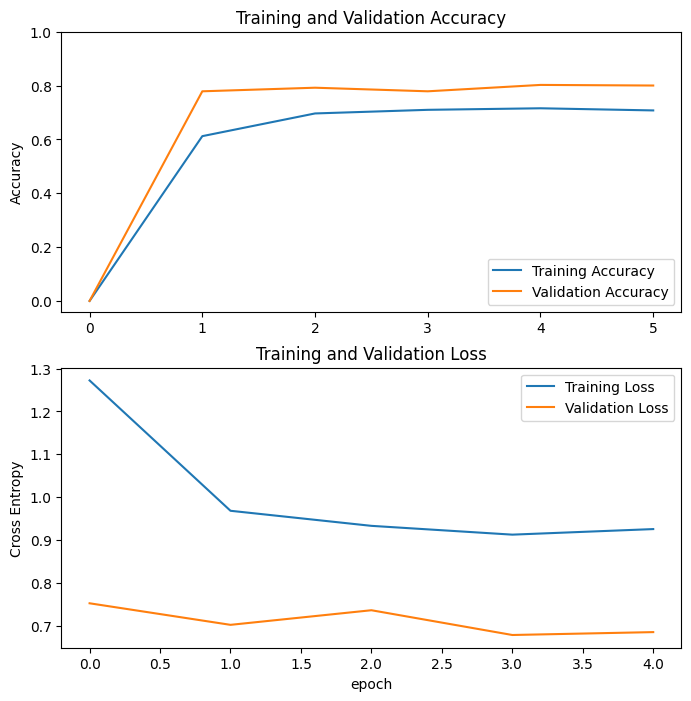

In [17]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
# Let's take a look to see how many layers are in the base model
base_model = model2.layers[2]
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [19]:
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 150

In [20]:
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Define a CategoricalCrossentropy loss function.
loss_function=tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate)

# Use accuracy as evaluation metric
metrics=['accuracy']


model2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

In [21]:
with tf.device('/device:GPU:0'):
    fine_tune_epochs = 5
    total_epochs =  initial_epochs + fine_tune_epochs

    history_fine = model2.fit(train_dataset,
                            epochs=total_epochs,
                            initial_epoch=history.epoch[-1],
                            validation_data=validation_dataset)

Epoch 5/10
 67/554 ━━━━━━━━━━━━━━━━━━━━ 2:00 247ms/step - accuracy: 0.7101 - loss: 0.8911

2025-01-28 14:37:56.470276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/554 ━━━━━━━━━━━━━━━━━━━━ 1:29 243ms/step - accuracy: 0.7276 - loss: 0.8645

2025-01-28 14:38:25.380939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/554 ━━━━━━━━━━━━━━━━━━━━ 1:09 242ms/step - accuracy: 0.7337 - loss: 0.8519

2025-01-28 14:38:44.705450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


292/554 ━━━━━━━━━━━━━━━━━━━━ 1:03 242ms/step - accuracy: 0.7352 - loss: 0.8484

2025-01-28 14:38:50.705947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


336/554 ━━━━━━━━━━━━━━━━━━━━ 52s 242ms/step - accuracy: 0.7375 - loss: 0.8429

2025-01-28 14:39:01.337317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


356/554 ━━━━━━━━━━━━━━━━━━━━ 47s 242ms/step - accuracy: 0.7384 - loss: 0.8406

2025-01-28 14:39:06.145102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


367/554 ━━━━━━━━━━━━━━━━━━━━ 45s 242ms/step - accuracy: 0.7388 - loss: 0.8393

2025-01-28 14:39:08.805644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


393/554 ━━━━━━━━━━━━━━━━━━━━ 38s 242ms/step - accuracy: 0.7399 - loss: 0.8364

2025-01-28 14:39:15.062391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


494/554 ━━━━━━━━━━━━━━━━━━━━ 14s 242ms/step - accuracy: 0.7441 - loss: 0.8253

2025-01-28 14:39:39.490452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/554 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - accuracy: 0.7445 - loss: 0.8243

2025-01-28 14:39:41.665524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7466 - loss: 0.8187

2025-01-28 14:40:01.144856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:40:07.964131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:40:07.964147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 169s 289ms/step - accuracy: 0.7466 - loss: 0.8186 - val_accuracy: 0.8503 - val_loss: 0.5678
Epoch 6/10
 43/554 ━━━━━━━━━━━━━━━━━━━━ 2:04 244ms/step - accuracy: 0.8300 - loss: 0.5757

2025-01-28 14:40:30.754687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


187/554 ━━━━━━━━━━━━━━━━━━━━ 1:28 242ms/step - accuracy: 0.8335 - loss: 0.5722

2025-01-28 14:41:05.490583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/554 ━━━━━━━━━━━━━━━━━━━━ 1:09 242ms/step - accuracy: 0.8335 - loss: 0.5714

2025-01-28 14:41:24.875337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


288/554 ━━━━━━━━━━━━━━━━━━━━ 1:04 242ms/step - accuracy: 0.8337 - loss: 0.5709

2025-01-28 14:41:29.964055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/554 ━━━━━━━━━━━━━━━━━━━━ 51s 242ms/step - accuracy: 0.8340 - loss: 0.5697

2025-01-28 14:41:42.466340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


347/554 ━━━━━━━━━━━━━━━━━━━━ 50s 242ms/step - accuracy: 0.8341 - loss: 0.5695

2025-01-28 14:41:44.157914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


377/554 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - accuracy: 0.8343 - loss: 0.5688

2025-01-28 14:41:51.369442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


394/554 ━━━━━━━━━━━━━━━━━━━━ 38s 242ms/step - accuracy: 0.8344 - loss: 0.5683

2025-01-28 14:41:55.470825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/554 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.8352 - loss: 0.5663

2025-01-28 14:42:19.074577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/554 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.8352 - loss: 0.5662

2025-01-28 14:42:20.776883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.8358 - loss: 0.5645

2025-01-28 14:42:38.306060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:42:42.645847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:42:42.645864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 156s 282ms/step - accuracy: 0.8358 - loss: 0.5645 - val_accuracy: 0.8688 - val_loss: 0.4913
Epoch 7/10
 42/554 ━━━━━━━━━━━━━━━━━━━━ 2:05 244ms/step - accuracy: 0.8657 - loss: 0.4818

2025-01-28 14:43:06.912365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


193/554 ━━━━━━━━━━━━━━━━━━━━ 1:28 244ms/step - accuracy: 0.8719 - loss: 0.4567

2025-01-28 14:43:43.715118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/554 ━━━━━━━━━━━━━━━━━━━━ 1:10 243ms/step - accuracy: 0.8721 - loss: 0.4568

2025-01-28 14:44:00.341491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


286/554 ━━━━━━━━━━━━━━━━━━━━ 1:05 243ms/step - accuracy: 0.8722 - loss: 0.4565

2025-01-28 14:44:06.122781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/554 ━━━━━━━━━━━━━━━━━━━━ 52s 243ms/step - accuracy: 0.8724 - loss: 0.4557

2025-01-28 14:44:18.679399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


350/554 ━━━━━━━━━━━━━━━━━━━━ 49s 243ms/step - accuracy: 0.8725 - loss: 0.4554

2025-01-28 14:44:21.601843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


370/554 ━━━━━━━━━━━━━━━━━━━━ 44s 243ms/step - accuracy: 0.8726 - loss: 0.4550

2025-01-28 14:44:26.428731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


385/554 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/step - accuracy: 0.8726 - loss: 0.4548

2025-01-28 14:44:30.041707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


498/554 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.8730 - loss: 0.4528

2025-01-28 14:44:57.310907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


500/554 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.8730 - loss: 0.4528

2025-01-28 14:44:57.801269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.8733 - loss: 0.4517

2025-01-28 14:45:13.122015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:45:16.222866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:45:16.222884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 155s 279ms/step - accuracy: 0.8733 - loss: 0.4517 - val_accuracy: 0.8780 - val_loss: 0.4703
Epoch 8/10
 48/554 ━━━━━━━━━━━━━━━━━━━━ 2:01 240ms/step - accuracy: 0.8972 - loss: 0.3652

2025-01-28 14:45:42.909290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/554 ━━━━━━━━━━━━━━━━━━━━ 1:29 241ms/step - accuracy: 0.8957 - loss: 0.3734

2025-01-28 14:46:14.955107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/554 ━━━━━━━━━━━━━━━━━━━━ 1:08 241ms/step - accuracy: 0.8966 - loss: 0.3711

2025-01-28 14:46:36.652333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


296/554 ━━━━━━━━━━━━━━━━━━━━ 1:02 241ms/step - accuracy: 0.8969 - loss: 0.3704

2025-01-28 14:46:42.669263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


345/554 ━━━━━━━━━━━━━━━━━━━━ 50s 241ms/step - accuracy: 0.8974 - loss: 0.3693

2025-01-28 14:46:54.529492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


356/554 ━━━━━━━━━━━━━━━━━━━━ 47s 241ms/step - accuracy: 0.8975 - loss: 0.3690

2025-01-28 14:46:57.181185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


364/554 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.8976 - loss: 0.3688

2025-01-28 14:46:59.115443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


392/554 ━━━━━━━━━━━━━━━━━━━━ 39s 241ms/step - accuracy: 0.8978 - loss: 0.3684

2025-01-28 14:47:05.889799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


505/554 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.8985 - loss: 0.3669

2025-01-28 14:47:33.134954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


515/554 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.8986 - loss: 0.3668

2025-01-28 14:47:35.550151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.8987 - loss: 0.3664

2025-01-28 14:47:47.682965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:47:50.190759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:47:50.190785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 154s 278ms/step - accuracy: 0.8987 - loss: 0.3664 - val_accuracy: 0.8799 - val_loss: 0.4692
Epoch 9/10
 50/554 ━━━━━━━━━━━━━━━━━━━━ 2:01 241ms/step - accuracy: 0.9179 - loss: 0.3142

2025-01-28 14:48:17.430783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


192/554 ━━━━━━━━━━━━━━━━━━━━ 1:31 251ms/step - accuracy: 0.9175 - loss: 0.3124

2025-01-28 14:48:53.639462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/554 ━━━━━━━━━━━━━━━━━━━━ 1:12 248ms/step - accuracy: 0.9175 - loss: 0.3114

2025-01-28 14:49:10.972245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


302/554 ━━━━━━━━━━━━━━━━━━━━ 1:02 247ms/step - accuracy: 0.9179 - loss: 0.3105

2025-01-28 14:49:20.084179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


340/554 ━━━━━━━━━━━━━━━━━━━━ 52s 247ms/step - accuracy: 0.9181 - loss: 0.3097

2025-01-28 14:49:29.209579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


359/554 ━━━━━━━━━━━━━━━━━━━━ 48s 246ms/step - accuracy: 0.9182 - loss: 0.3095

2025-01-28 14:49:33.817283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


369/554 ━━━━━━━━━━━━━━━━━━━━ 45s 246ms/step - accuracy: 0.9183 - loss: 0.3093

2025-01-28 14:49:36.224314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


396/554 ━━━━━━━━━━━━━━━━━━━━ 38s 246ms/step - accuracy: 0.9184 - loss: 0.3089

2025-01-28 14:49:42.730062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


491/554 ━━━━━━━━━━━━━━━━━━━━ 15s 246ms/step - accuracy: 0.9189 - loss: 0.3071

2025-01-28 14:50:05.948046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


503/554 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.9190 - loss: 0.3069

2025-01-28 14:50:08.829341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.9192 - loss: 0.3060

2025-01-28 14:50:23.959193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:50:29.428896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:50:29.428917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 156s 282ms/step - accuracy: 0.9192 - loss: 0.3060 - val_accuracy: 0.8756 - val_loss: 0.4874
Epoch 10/10
 43/554 ━━━━━━━━━━━━━━━━━━━━ 2:04 243ms/step - accuracy: 0.9265 - loss: 0.2711

2025-01-28 14:50:52.062303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


181/554 ━━━━━━━━━━━━━━━━━━━━ 1:29 241ms/step - accuracy: 0.9267 - loss: 0.2751

2025-01-28 14:51:25.230114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/554 ━━━━━━━━━━━━━━━━━━━━ 1:09 241ms/step - accuracy: 0.9283 - loss: 0.2721

2025-01-28 14:51:45.949928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


295/554 ━━━━━━━━━━━━━━━━━━━━ 1:02 241ms/step - accuracy: 0.9287 - loss: 0.2711

2025-01-28 14:51:52.700108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


338/554 ━━━━━━━━━━━━━━━━━━━━ 52s 241ms/step - accuracy: 0.9291 - loss: 0.2698

2025-01-28 14:52:03.153715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


352/554 ━━━━━━━━━━━━━━━━━━━━ 48s 241ms/step - accuracy: 0.9293 - loss: 0.2694

2025-01-28 14:52:06.554256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: too many profiles


376/554 ━━━━━━━━━━━━━━━━━━━━ 42s 241ms/step - accuracy: 0.9295 - loss: 0.2688

2025-01-28 14:52:12.361577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


384/554 ━━━━━━━━━━━━━━━━━━━━ 41s 241ms/step - accuracy: 0.9295 - loss: 0.2686

2025-01-28 14:52:14.303022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


497/554 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - accuracy: 0.9303 - loss: 0.2664

2025-01-28 14:52:41.498458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


507/554 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.9304 - loss: 0.2662

2025-01-28 14:52:43.937423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.9307 - loss: 0.2655

2025-01-28 14:52:58.668316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:53:01.350622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-28 14:53:01.350646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


554/554 ━━━━━━━━━━━━━━━━━━━━ 154s 278ms/step - accuracy: 0.9307 - loss: 0.2655 - val_accuracy: 0.8875 - val_loss: 0.4676


In [23]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

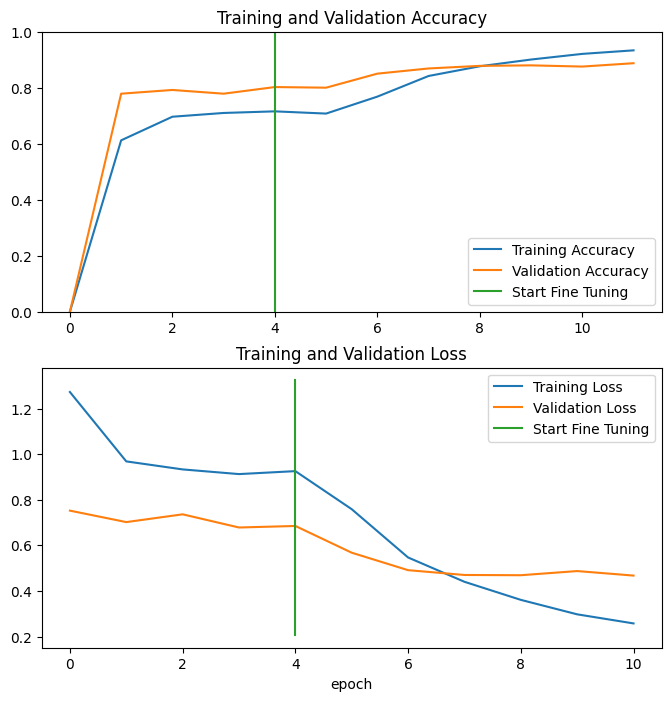

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


2025-01-28 14:57:45.118835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


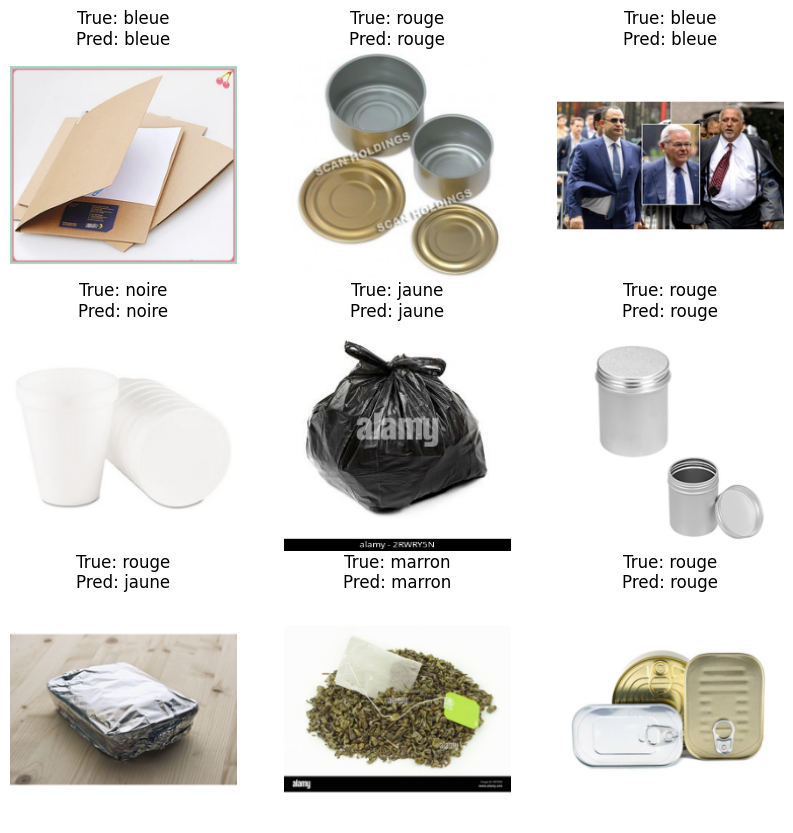

In [25]:
plt.figure(figsize=(10, 10))
for images, labels in validation_dataset.take(1):
    # Predict the labels for the batch of images
    predictions = model2.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)
    
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        true_label_index = tf.argmax(labels[i]).numpy()  # Get the index of the highest value (true class)
        predicted_label_index = predicted_labels[i].numpy()  # Get the index of the highest value (predicted class)
        
        true_label_name = class_names[true_label_index]
        predicted_label_name = class_names[predicted_label_index]
        
        plt.title(f'True: {true_label_name}\nPred: {predicted_label_name}')
        plt.axis("off")

plt.show()

In [26]:
model2.save("/Users/marksalloum/Polytech/ProjetViveris/backend/ai_test/fine_tuned_resnet50.keras")

In [27]:
import zipfile

model_file = "model.keras"
zip_filename = "model_backup.zip"

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_file)

print(f"✅ Model zipped successfully as {zip_filename}")



NotADirectoryError: [Errno 20] Not a directory: 'fine_tuned_resnet50.keras'